# NLP7337  HW1 
 pankaj kumar

### 1.	Implement a Neural Network for both classification (use the sklearn load_digits) and one for regression.

#### Solution :

used sklearn data and did some preprocessing to make response categorical.

In [1]:
from sklearn import *
from tensorflow import keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from tensorflow.keras.utils import to_categorical


digits = load_digits()
X, y  = load_digits(return_X_y=True)
one_hot_train_labels = to_categorical(y)
#one_hot_test_labels = to_categorical(test_labels)
model = keras.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(64,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

#### a.	How did you know when you were done training? 

#### Solution
used early stopping callback to stop training when results don't improve 

In [2]:
tb_collback = keras.callbacks.TensorBoard(log_dir = 'logs_classification', histogram_freq= 1)
early_sp_cb= keras.callbacks.EarlyStopping(monitor='acc', min_delta=0.01, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks = [tb_collback, early_sp_cb]

#### b.	How did you optimize your parameters?

#### Solution
Tried different parameters for epoch and batchsize. 

In [3]:
history = model.fit(X, one_hot_train_labels, epochs=10, batch_size=20, callbacks= callbacks)

Train on 1797 samples
Epoch 1/10
1797/1797 [==============================] - 0s 223us/sample - loss: 1.8758 - acc: 0.5609
Epoch 2/10
1797/1797 [==============================] - 0s 76us/sample - loss: 0.3005 - acc: 0.9037
Epoch 3/10
1797/1797 [==============================] - 0s 69us/sample - loss: 0.1488 - acc: 0.9527
Epoch 4/10
1797/1797 [==============================] - 0s 83us/sample - loss: 0.0958 - acc: 0.9766
Epoch 5/10
1797/1797 [==============================] - 0s 80us/sample - loss: 0.0608 - acc: 0.9878
Epoch 6/10
1797/1797 [==============================] - 0s 71us/sample - loss: 0.0449 - acc: 0.9911
Epoch 7/10
1797/1797 [==============================] - 0s 79us/sample - loss: 0.0339 - acc: 0.9933
Epoch 8/10
1797/1797 [==============================] - 0s 68us/sample - loss: 0.0279 - acc: 0.9961


#### c.	Plot your training/validation curves to bolster your arguments ?

#### Solution

used tensorboard to plot loss on each epoch

In [4]:
import os
PATH = os.getenv('PATH')
%env PATH=/Users/pankaj/anaconda/envs/nlp/bin:$PATH


env: PATH=/Users/pankaj/anaconda/envs/nlp/bin:/Users/pankaj/anaconda/condabin:/Users/pankaj/anaconda/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/TeX/texbin:/opt/X11/bin


#### somehow I need to run below line verytime i open notebook to render the tensorboard chart

In [5]:
%load_ext tensorboard
%tensorboard --logdir logs_classification

Reusing TensorBoard on port 6006 (pid 13509), started 0:43:52 ago. (Use '!kill 13509' to kill it.)

#### d.	Plot a histogram of your weights from a particular layer (it must have at least 50 neurons)

#### Solution 

get weights from layers to plot it.

(array([ 3.,  4.,  6., 12.,  7., 10., 12.,  4.,  2.,  4.]),
 array([-0.03839502, -0.0308969 , -0.02339877, -0.01590065, -0.00840253,
        -0.0009044 ,  0.00659372,  0.01409184,  0.02158997,  0.02908809,
         0.03658621], dtype=float32),
 <a list of 10 Patch objects>)

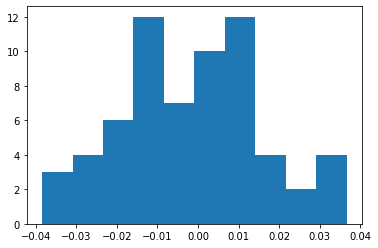

In [6]:
plt.hist(model.layers[1].weights[1].numpy())

(array([ 2.,  4.,  9., 18., 11.,  8.,  7.,  3.,  1.,  1.]),
 array([-0.03464157, -0.02586403, -0.0170865 , -0.00830897,  0.00046856,
         0.00924609,  0.01802363,  0.02680116,  0.03557869,  0.04435622,
         0.05313375], dtype=float32),
 <a list of 10 Patch objects>)

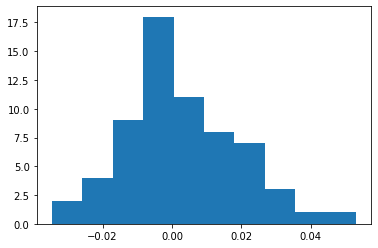

In [7]:
plt.hist(model.layers[0].weights[1].numpy())

### Question #1 Regression 


#### using boston dataset

In [8]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

train_targets=train_labels
test_targets=test_labels

#### a.	How did you know when you were done training?

#### Solution
used early stopping callback to stop training when results don't improve 

In [9]:
tb_collback = keras.callbacks.TensorBoard(log_dir = 'logs_regression', histogram_freq= 1)
early_sp_cb= keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01, patience=3, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
callbacks = [tb_collback, early_sp_cb]

#### b.	How did you optimize your parameters?

#### Solution :
tried different values for epochs and batchsizes 

In [10]:
reg_model = keras.models.Sequential()
reg_model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
reg_model.add(keras.layers.Dense(64))
reg_model.add(keras.layers.Dense(1))
reg_model.compile(optimizer = 'rmsprop', loss = 'mse' , metrics = ['mae'])
reg_model.fit(train_data , train_labels, epochs = 20 , batch_size = 32, callbacks = callbacks)

Train on 404 samples
Epoch 1/20
404/404 [==============================] - 0s 1ms/sample - loss: 1293.9109 - mae: 18.4417
Epoch 2/20
404/404 [==============================] - 0s 65us/sample - loss: 326.9375 - mae: 15.4216
Epoch 3/20
404/404 [==============================] - 0s 65us/sample - loss: 355.8920 - mae: 16.4549
Epoch 4/20
404/404 [==============================] - 0s 64us/sample - loss: 413.1216 - mae: 18.2153
Epoch 5/20
404/404 [==============================] - 0s 63us/sample - loss: 229.9100 - mae: 11.6801
Epoch 6/20
404/404 [==============================] - 0s 68us/sample - loss: 350.1514 - mae: 13.9814
Epoch 7/20
404/404 [==============================] - 0s 63us/sample - loss: 380.0704 - mae: 16.2381
Epoch 8/20
404/404 [==============================] - 0s 63us/sample - loss: 323.2790 - mae: 15.6652


#### c.	Plot your training/validation curves to bolster your arguments

#### somehow I need to run below line verytime i open notebook to render the tensorboard chart

In [15]:
%tensorboard --logdir logs_regression

Reusing TensorBoard on port 6007 (pid 13544), started 0:39:05 ago. (Use '!kill 13544' to kill it.)

#### d.	Plot a histogram of your weights from a particular layer (it must have at least 50 neurons)

(array([ 1.,  0.,  0.,  5., 27.,  1.,  0.,  2.,  0., 28.]),
 array([-0.00995999, -0.00849938, -0.00703877, -0.00557816, -0.00411755,
        -0.00265695, -0.00119634,  0.00026427,  0.00172488,  0.00318549,
         0.00464609], dtype=float32),
 <a list of 10 Patch objects>)

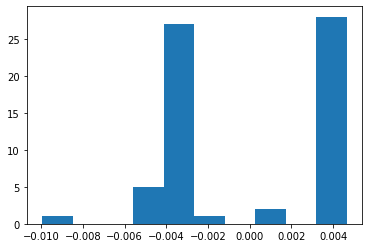

In [12]:
plt.hist(reg_model.layers[1].weights[1].numpy())

#### Question 2

2.	Scrape the top 100 Billboard Artists from this website:
https://www.billboard.com/charts/hot-100

Your answer must be a function that I can run from my computer so that I can get a list of the artist, song, and position.

#### Solution 

used beutiful soup and found the specific css class to extract the table node. inspection of elements gives format.


In [13]:
import requests
from bs4 import BeautifulSoup
def question_2():
    response  = requests.get('https://www.billboard.com/charts/hot-100')
    soup = BeautifulSoup(response.text)
    elemnts  =[elems.text.strip().split('\n')  for elems in soup.find_all(class_='chart-element__wrapper')]
    records =[[elem[i] for i in [0,4,5]] for elem in elemnts]
    return records

In [14]:
records = question_2()
header = ['Position , Song , Artist']

print(header)
for rec in records :
    print(rec)

['Position , Song , Artist']
['1', 'THE SCOTTS', 'THE SCOTTS, Travis Scott & Kid Cudi']
['2', 'Blinding Lights', 'The Weeknd']
['3', 'Toosie Slide', 'Drake']
['4', 'Savage', 'Megan Thee Stallion']
['5', 'The Box', 'Roddy Ricch']
['6', 'Say So', 'Doja Cat']
['7', "Don't Start Now", 'Dua Lipa']
['8', 'Circles', 'Post Malone']
['9', 'Intentions', 'Justin Bieber Featuring Quavo']
['10', 'Adore You', 'Harry Styles']
['11', 'Righteous', 'Juice WRLD']
['12', 'Life Is Good', 'Future Featuring Drake']
['13', 'My Oh My', 'Camila Cabello Featuring DaBaby']
['14', 'ROCKSTAR', 'DaBaby Featuring Roddy Ricch']
['15', 'The Bones', 'Maren Morris']
['16', 'everything i wanted', 'Billie Eilish']
['17', 'Someone You Loved', 'Lewis Capaldi']
['18', 'Nobody But You', 'Blake Shelton Duet With Gwen Stefani']
['19', 'I Hope', 'Gabby Barrett']
['20', 'Blueberry Faygo', 'Lil Mosey']
['21', 'Memories', 'Maroon 5']
['22', "Chasin' You", 'Morgan Wallen']
['23', 'Roses (Imanbek Remix)', 'SAINt JHN']
['24', 'Falling'